##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

[*********************100%***********************]  1 of 1 completed


Epoch 1/20
30/30 [==============================] - 15s 169ms/step - loss: 0.0261 - val_loss: 0.0037
Epoch 2/20
30/30 [==============================] - 3s 94ms/step - loss: 0.0021 - val_loss: 0.0091
Epoch 3/20
30/30 [==============================] - 3s 95ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 4/20
30/30 [==============================] - 3s 96ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 5/20
30/30 [==============================] - 3s 97ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 6/20
30/30 [==============================] - 2s 75ms/step - loss: 9.8931e-04 - val_loss: 0.0017
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 9.4291e-04 - val_loss: 0.0021
Epoch 8/20
30/30 [==============================] - 1s 48ms/step - loss: 9.0784e-04 - val_loss: 0.0019
Epoch 9/20
30/30 [==============================] - 1s 47ms/step - loss: 9.0068e-04 - val_loss: 0.0017
Epoch 10/20
30/30 [==============================] - 1s 46ms/step - loss: 8.5161e-04 - val_

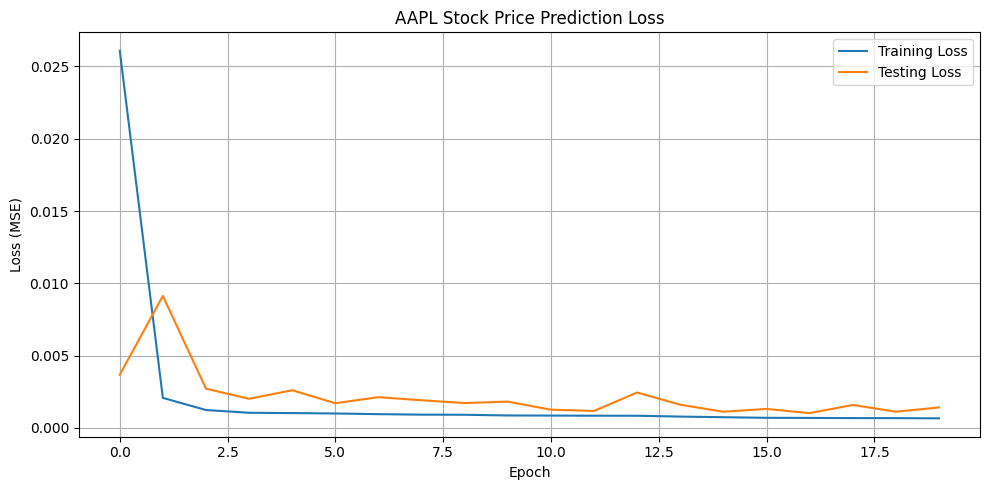

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 1. Fetch stock data (AAPL)
ticker = 'AAPL'
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
data = df[['Close']].copy()

# 2. Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(data_scaled, sequence_length)

# 4. Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# 7. Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title(f"{ticker} Stock Price Prediction Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np

# Define company names or tickers
companies = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Create a dictionary to hold DataFrames
company_data = {}

# Generate dummy data
for company in companies:
    dates = pd.date_range(start='2023-01-01', periods=10)
    volume = np.random.randint(1000, 5000, size=10)
    close_prices = np.random.uniform(100, 500, size=10)

    df = pd.DataFrame({
        'Date': dates,
        'Volume': volume,
        'Close': close_prices
    })

    df.set_index('Date', inplace=True)
    company_data[company] = df

# Optional: Print one of the DataFrames
print(company_data['AAPL'])


            Volume       Close
Date                          
2023-01-01    1988  187.154528
2023-01-02    2196  450.840787
2023-01-03    4776  178.069781
2023-01-04    1091  134.936841
2023-01-05    3135  271.213821
2023-01-06    3119  247.342132
2023-01-07    1438  290.972231
2023-01-08    2680  301.991797
2023-01-09    4596  166.584715
2023-01-10    1323  381.584358



Last 10 rows of combined DataFrame:
                                 Open        High         Low       Close  \
Date                                                                        
2025-05-23 00:00:00-04:00  198.899994  202.369995  197.850006  200.990005   
2025-05-27 00:00:00-04:00  203.089996  206.690002  202.190002  206.020004   
2025-05-28 00:00:00-04:00  205.919998  207.660004  204.410004  204.720001   
2025-05-29 00:00:00-04:00  208.029999  208.809998  204.229996  205.699997   
2025-05-30 00:00:00-04:00  204.839996  205.990005  201.699997  205.009995   
2025-06-02 00:00:00-04:00  204.979996  207.000000  202.679993  206.649994   
2025-06-03 00:00:00-04:00  207.110001  208.949997  205.029999  205.710007   
2025-06-04 00:00:00-04:00  206.550003  208.179993  205.179993  207.229996   
2025-06-05 00:00:00-04:00  209.550003  212.809998  207.559998  207.910004   
2025-06-06 00:00:00-04:00  212.399994  213.869995  210.500000  213.570007   

                             Volume  D

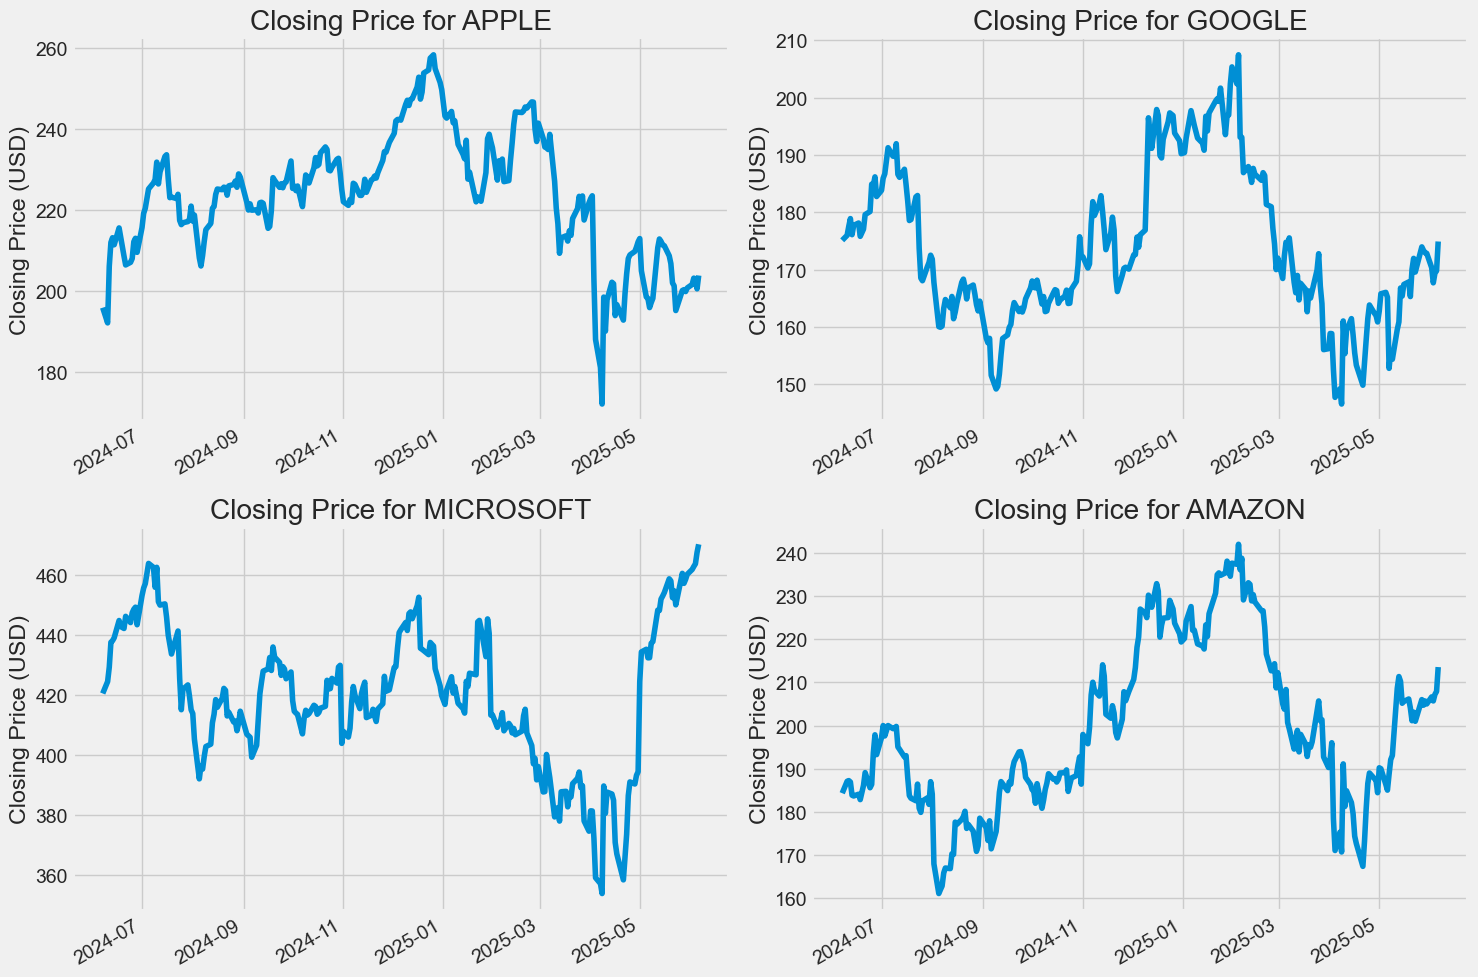

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Import yfinance
try:
    import yfinance as yf
except ModuleNotFoundError:
    print("yfinance not found. Please install it using 'pip install yfinance'")
    exit()

from datetime import datetime

# Set plotting style
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Real companies
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Set up start and end times for data grab (last 1 year)
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data using yfinance
company_list = []
for stock in tech_list:
    try:
        ticker = yf.Ticker(stock)
        df = ticker.history(start=start, end=end)
        if not df.empty:
            df['company_name'] = company_name[tech_list.index(stock)]
            # Convert column names to match pandas_datareader format
            df = df.rename(columns={
                'Open': 'Open',
                'High': 'High',
                'Low': 'Low',
                'Close': 'Close',
                'Volume': 'Volume',
                'Dividends': 'Dividends',
                'Stock Splits': 'Stock Splits'
            })
            company_list.append(df)
        else:
            print(f"No data for {stock}")
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")
        company_list.append(pd.DataFrame())

# Concatenate all DataFrames
if company_list:
    df = pd.concat(company_list, axis=0)
    print("\nLast 10 rows of combined DataFrame:")
    print(df.tail(10))
else:
    print("No data available for any stock")
    exit()

# Set up subplot grid
num_companies = len(company_list)
cols = 2
rows = math.ceil(num_companies / cols)

print(f"\nTotal companies: {num_companies}, rows: {rows}, cols: {cols}")

plt.figure(figsize=(15, 5 * rows))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plot closing prices
for i, company in enumerate(company_list, 1):
    print(f"Plotting subplot {i} of grid ({rows} x {cols})")
    plt.subplot(rows, cols, i)
    
    if not company.empty and 'Close' in company.columns:
        company['Close'].plot()
        plt.ylabel('Closing Price (USD)')
        plt.xlabel(None)
        # Print most recent closing price
        recent_close = company['Close'].iloc[-1] if not company.empty else "N/A"
        print(f"Most recent closing price for {company_name[i-1]}: {recent_close:.2f}")
    else:
        plt.text(0.5, 0.5, 'No Closing Price Data', ha='center', va='center')
    
    company_name_i = company_name[i - 1] if i - 1 < len(company_name) else f"Company {i}"
    plt.title(f"Closing Price for {company_name_i}")

plt.tight_layout()
plt.show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Epoch 1/50
30/30 [==============================] - 15s 174ms/step - loss: 0.0213 - val_loss: 0.0018
Epoch 2/50
30/30 [==============================] - 3s 96ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 3/50
30/30 [==============================] - 3s 94ms/step - loss: 8.7205e-04 - val_loss: 0.0033
Epoch 4/50
30/30 [==============================] - 3s 94ms/step - loss: 8.2497e-04 - val_loss: 0.0033
Epoch 5/50
30/30 [==============================] - 3s 96ms/step - loss: 7.9599e-04 - val_loss: 0.0028
Epoch 6/50
30/30 [==============================] - 3s 95ms/step - loss: 8.0092e-04 - val_loss: 0.0028
Epoch 7/50
30/30 [==============================] - 3s 97ms/step - loss: 7.6802e-04 - val_loss: 0.0015
Epoch 8/50
30/30 [==============================] - 3s 95ms/step - loss: 7.4619e-04 - val_loss: 0.0032
Epoch 9/50
30/30 [==============================] - 3s 95ms/step - loss: 7.4939e-04 - val_loss: 0.0019
Epoch 10/50
30/30 [==============================] - 3s 96ms/step - loss: 7.894

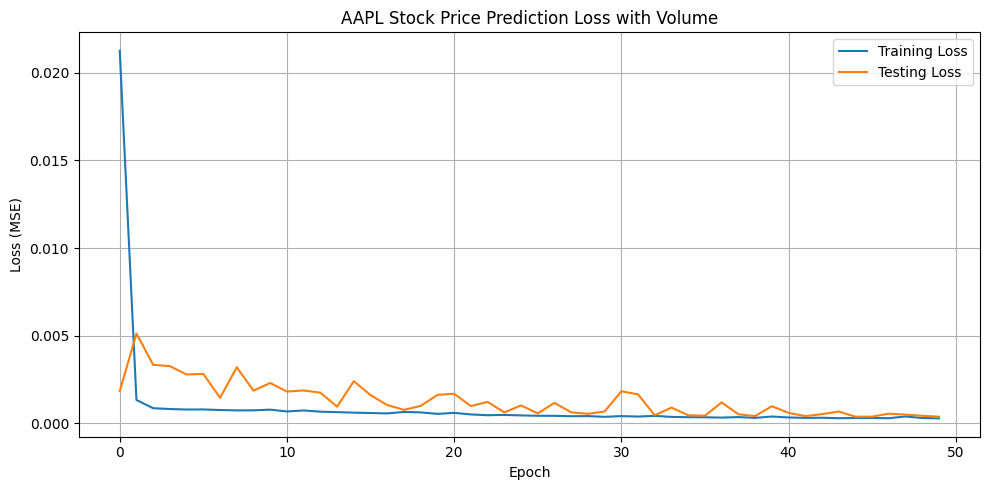

8/8 [==============================] - 2s 34ms/step


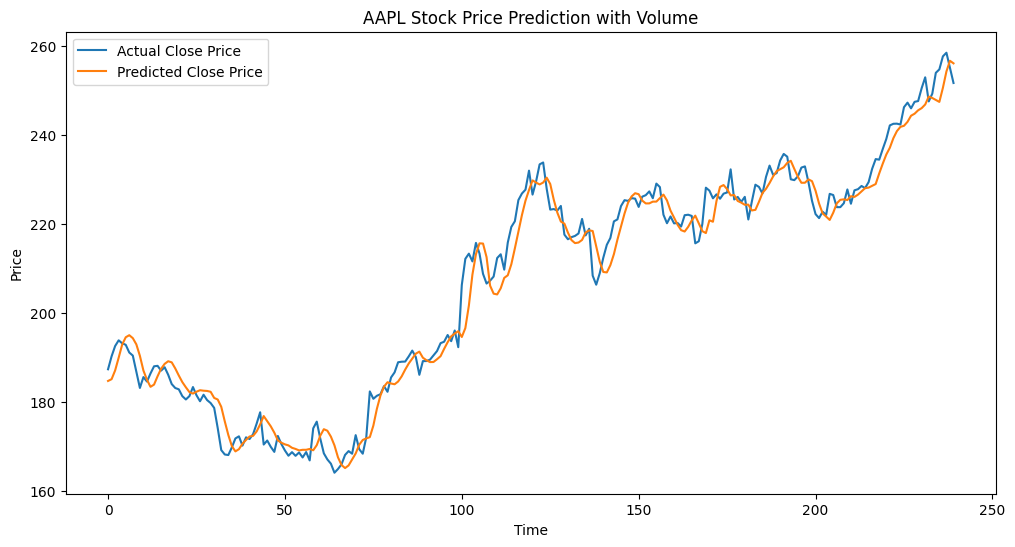

Test RMSE: 4.0042


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 1. Fetch stock data (AAPL) with Close and Volume
ticker = 'AAPL'
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
data = df[['Close', 'Volume']].copy()

# 2. Normalize data (both Close and Volume)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])  # now each sample has shape (seq_length, 2)
        y.append(data[i, 0])  # predict closing price only (first column)
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(data_scaled, sequence_length)

# 4. Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build LSTM model (input_shape=(60, 2) for Close and Volume)
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# 7. Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title(f"{ticker} Stock Price Prediction Loss with Volume")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Predict and inverse transform the closing price
y_pred_scaled = model.predict(X_test)

# Since only closing price was predicted, we inverse transform only the Close feature
# We need to scale back predictions and true values, but scaler has 2 features,
# so we need to create a dummy array for inverse transform:

y_test_scaled_full = np.zeros((len(y_test), 2))
y_test_scaled_full[:, 0] = y_test  # put true closing price scaled
y_pred_scaled_full = np.zeros((len(y_pred_scaled), 2))
y_pred_scaled_full[:, 0] = y_pred_scaled[:, 0]

# Inverse transform
y_test_orig = scaler.inverse_transform(y_test_scaled_full)[:, 0]
y_pred_orig = scaler.inverse_transform(y_pred_scaled_full)[:, 0]

# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test_orig, label='Actual Close Price')
plt.plot(y_pred_orig, label='Predicted Close Price')
plt.title(f"{ticker} Stock Price Prediction with Volume")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
print(f"Test RMSE: {rmse:.4f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\Jizlan\AppData\Local\Temp\ipykernel_21940\3338747744.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Jizlan\miniconda3\envs\virenv1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


📊 Trading Volume (First 10 rows):

                APPLE    GOOGLE  MICROSOFT    AMAZON
Date                                                
2020-01-02  135480400  28132000   22622100  80580000
2020-01-03  146322800  23728000   21116200  75288000
2020-01-06  118387200  34646000   20813700  81236000
2020-01-07  108872000  30054000   21634100  80898000
2020-01-08  132079200  30560000   27746500  70160000
2020-01-09  170108400  30018000   21385000  63346000
2020-01-10  140644800  36414000   20725900  57074000
2020-01-13  121532000  33046000   21626500  55616000
2020-01-14  161954400  31178000   23477400  68818000
2020-01-15  121923600  25654000   21417900  57932000


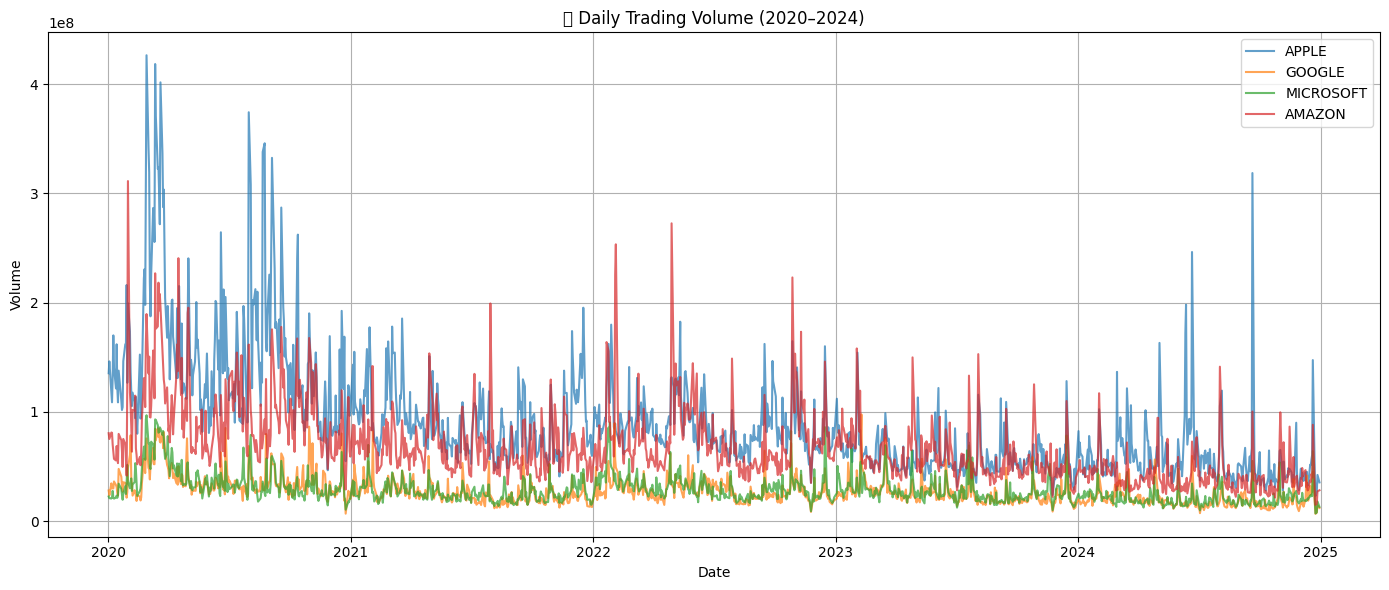

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Tickers and company names
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

volume_data = {}

# Download volume data
for ticker, name in zip(tech_list, company_names):
    df = yf.download(ticker, start='2020-01-01', end='2024-12-31')

    # Make sure data isn't empty and 'Volume' column exists
    if not df.empty and 'Volume' in df.columns:
        volume_data[name] = df['Volume']
    else:
        print(f"⚠️ Skipping {name} - no data found.")

# Combine Series into DataFrame aligned by date
if volume_data:
    volume_df = pd.concat(volume_data.values(), axis=1)
    volume_df.columns = volume_data.keys()

    # Show the first 10 rows
    print("📊 Trading Volume (First 10 rows):\n")
    print(volume_df.head(10))

    # Plot trading volume
    plt.figure(figsize=(14, 6))
    for name in volume_df.columns:
        plt.plot(volume_df.index, volume_df[name], label=name, alpha=0.7)

    plt.title("📈 Daily Trading Volume (2020–2024)")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❌ No valid volume data found for any company.")



### import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

def prepare_data(ticker, start_date, end_date, seq_length=60):
    df = yf.download(ticker, start=start_date, end=end_date)
    data = df[['Close', 'Volume']].copy()
    
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(seq_length, len(data_scaled)):
        X.append(data_scaled[i-seq_length:i])
        y.append(data_scaled[i, 0])  # Predict Close price only
    
    X, y = np.array(X), np.array(y)
    return X, y, scaler

def build_model(input_shape):
    model = Sequential([
        LSTM(100, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_and_evaluate(ticker, company_label):
    print(f"\n📊 Training model for {company_label} ({ticker})")
    
    X, y, scaler = prepare_data(ticker, "2020-01-01", "2024-12-31")
    
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    model = build_model((X_train.shape[1], X_train.shape[2]))
    
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    
    # Predict
    y_pred_scaled = model.predict(X_test)
    
    # Inverse transform predictions
    y_test_scaled_full = np.zeros((len(y_test), 2))
    y_test_scaled_full[:, 0] = y_test
    y_pred_scaled_full = np.zeros((len(y_pred_scaled), 2))
    y_pred_scaled_full[:, 0] = y_pred_scaled[:, 0]
    
    y_test_orig = scaler.inverse_transform(y_test_scaled_full)[:, 0]
    y_pred_orig = scaler.inverse_transform(y_pred_scaled_full)[:, 0]
    
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    print(f"{company_label} ({ticker}) Test RMSE: {rmse:.4f}")
    
    # Plot loss
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{company_label} ({ticker}) Training vs Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot prediction vs actual
    plt.figure(figsize=(12,6))
    plt.plot(y_test_orig, label='Actual Close Price')
    plt.plot(y_pred_orig, label='Predicted Close Price')
    plt.title(f"{company_label} ({ticker}) Actual vs Predicted Close Price")
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()
    
    return model, scaler, rmse

# Loop through multiple companies
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

results = {}

for ticker, name in zip(tech_list, company_names):
    model, scaler, rmse = train_and_evaluate(ticker, name)
    results[ticker] = {'Company': name, 'RMSE': rmse}

# Summary
print("\n📈 Final RMSE Summary:")
for ticker in tech_list:
    print(f"{results[ticker]['Company']} ({ticker}): RMSE = {results[ticker]['RMSE']:.4f}")


In [3]:
print(yf.download("AAPL", period="1y").head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-05-22  190.011383  191.922459  189.384326  191.375016  34648500
2024-05-23  186.010101  190.110918  185.761265  190.091007  51005900
2024-05-24  189.095657  189.692870  187.164685  187.941069  36294600
2024-05-28  189.105621  192.101605  188.219765  190.618535  52280100
2024-05-29  189.404205  191.355088  188.627837  188.727378  53068000


C:\Users\Jizlan\AppData\Local\Temp\ipykernel_21940\2638377406.py:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\Jizlan\miniconda3\envs\virenv1\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


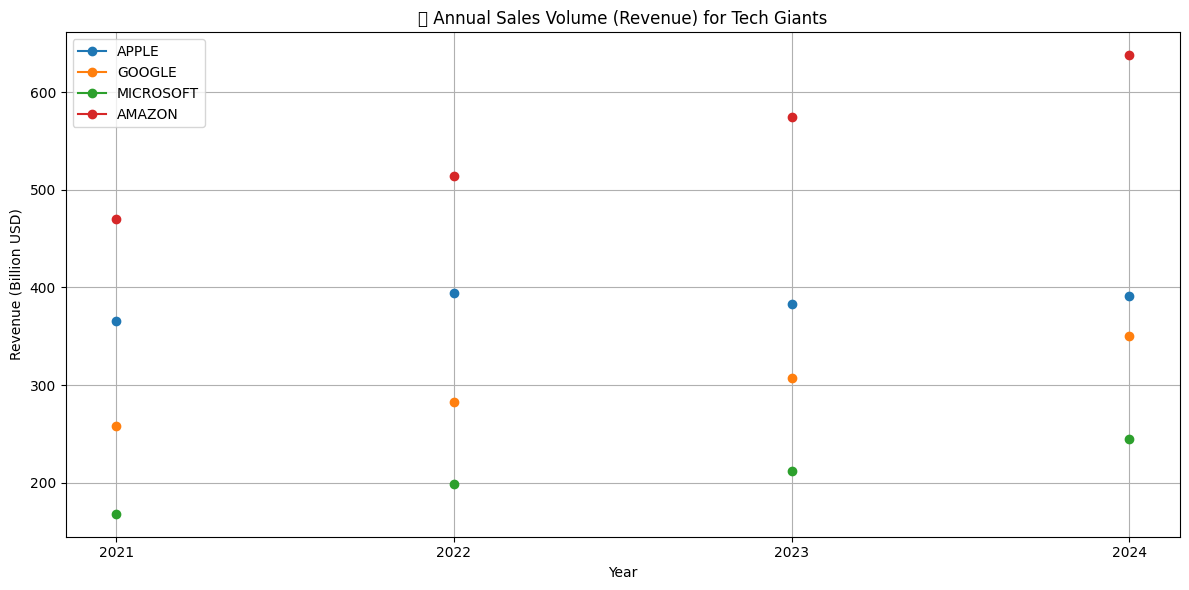

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of tickers and company names
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

# Dictionary to store revenue data
revenue_data = {}

for ticker, name in zip(tech_list, company_names):
    stock = yf.Ticker(ticker)
    income_stmt = stock.financials  # Annual income statement
    
    if 'Total Revenue' in income_stmt.index:
        revenue = income_stmt.loc['Total Revenue']
        revenue_data[name] = revenue
    else:
        print(f"⚠️ Revenue data not found for {name}")
        revenue_data[name] = pd.Series(dtype=float)

# Combine into DataFrame
revenue_df = pd.DataFrame(revenue_data)

# Format index to year only
revenue_df.index = revenue_df.index.strftime('%Y')

# Sort index (year)
revenue_df = revenue_df.sort_index()

# Convert to billions
revenue_df = revenue_df / 1e9

# Plotting
plt.figure(figsize=(12, 6))
for company in revenue_df.columns:
    plt.plot(revenue_df.index, revenue_df[company], marker='o', label=company)

plt.title("📈 Annual Sales Volume (Revenue) for Tech Giants")
plt.xlabel("Year")
plt.ylabel("Revenue (Billion USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


YF.download() has changed argument auto_adjust default to True
✅ Saved plot to stock_moving_averages.png


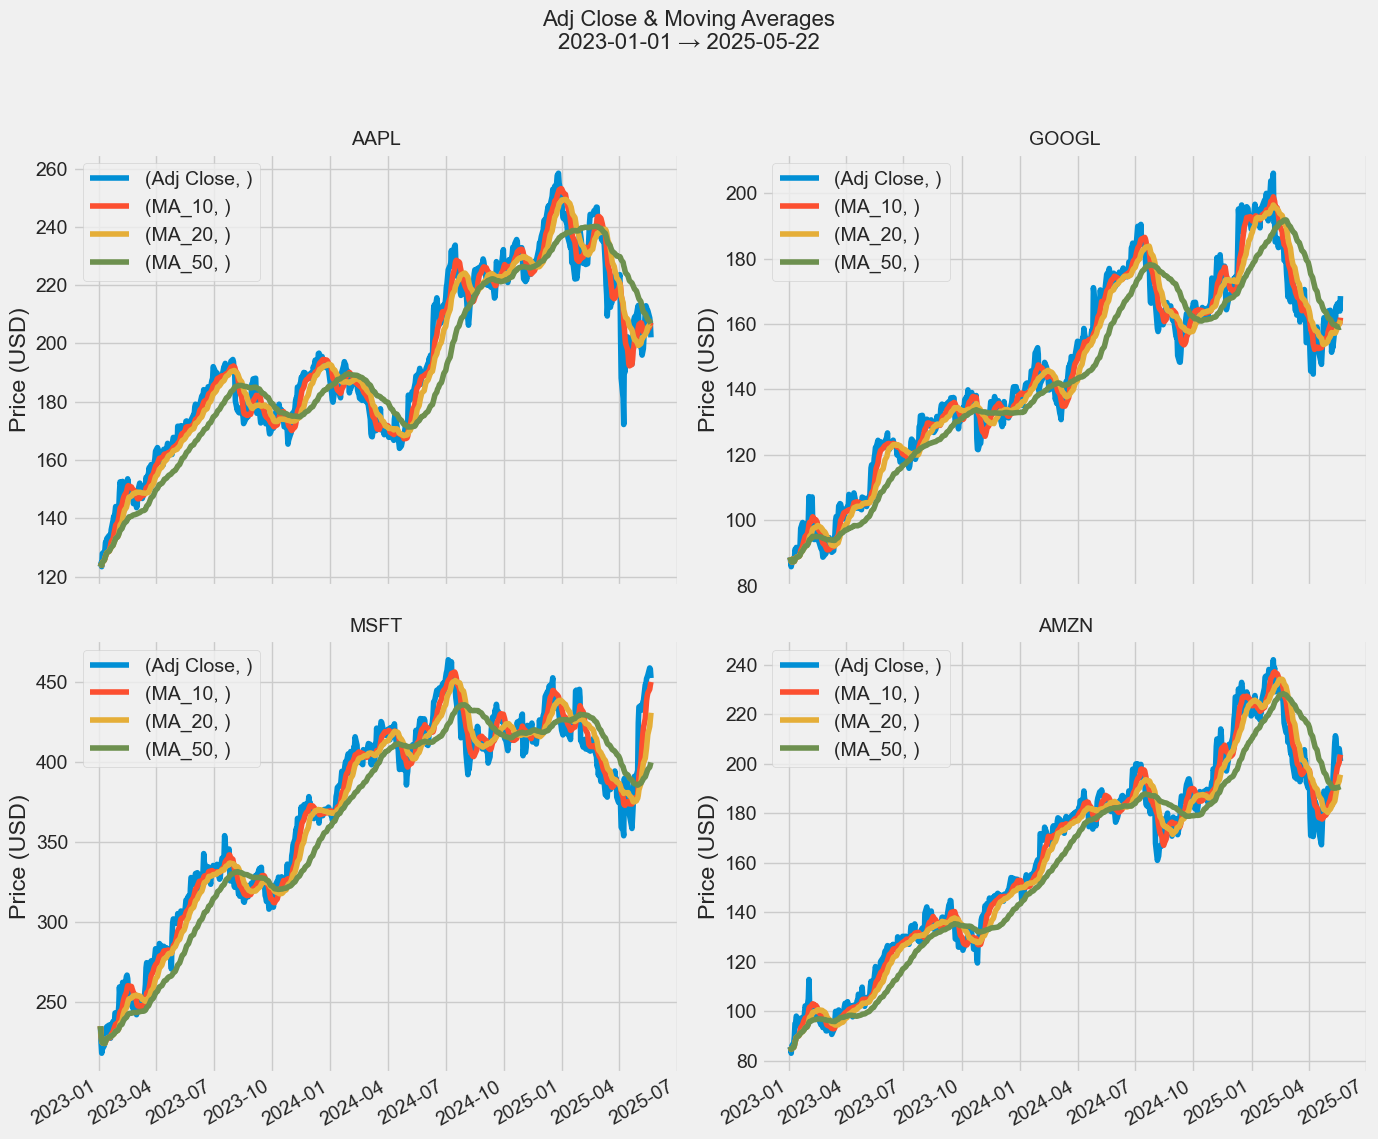

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_and_plot_mas(
    symbols,
    start_date: str,
    end_date: str,
    ma_days: list[int],
    output_path: str = "stock_moving_averages.png"
):
    """
    Downloads Adj Close data for each symbol, computes moving averages,
    plots them in a 2x2 grid, and saves the figure.
    """
    stock_data = {}

    for symbol in symbols:
        try:
            df = yf.download(symbol, start=start_date, end=end_date, progress=False)
        except Exception as e:
            print(f"❌ Error downloading {symbol}: {e}")
            continue

        # Ensure we have an 'Adj Close'
        if 'Adj Close' not in df.columns:
            if 'Close' in df.columns:
                df['Adj Close'] = df['Close']
            else:
                print(f"⚠️  No price data for {symbol}, skipping.")
                continue

        # Compute MAs
        for ma in ma_days:
            df[f"MA_{ma}"] = df['Adj Close'].rolling(window=ma, min_periods=1).mean()

        stock_data[symbol] = df

    # Plotting
    n = len(symbols)
    cols = 2
    rows = (n + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(14, 6*rows), sharex=True)
    axes = axes.flatten()

    for ax, symbol in zip(axes, symbols):
        df = stock_data.get(symbol)
        if df is None or df.empty:
            ax.set_visible(False)
            continue

        plot_cols = ['Adj Close'] + [f"MA_{ma}" for ma in ma_days]
        df[plot_cols].dropna().plot(ax=ax)
        ax.set_title(symbol, fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel("Price (USD)")
        ax.legend(loc='best')

    # Turn off any unused subplots
    for ax in axes[len(symbols):]:
        ax.set_visible(False)

    fig.suptitle(
        f"Adj Close & Moving Averages\n{start_date} → {end_date}",
        fontsize=16
    )
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(output_path)
    print(f"✅ Saved plot to {output_path}")
    plt.show()


if __name__ == "__main__":
    # — Customize these —
    company_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
    ma_days      = [10, 20, 50]
    start_date   = "2023-01-01"
    end_date     = datetime.today().strftime("%Y-%m-%d")

    fetch_and_plot_mas(company_list, start_date, end_date, ma_days)


[*********************100%***********************]  5 of 5 completed


(2612, 5)
Ticker           AAPL     AMZN      GOOGL       MSFT       TSLA
Date                                                           
2015-01-02  24.288574  15.4260  26.351517  39.998703  14.620667
2015-01-05  23.604334  15.1095  25.849415  39.630878  14.006000
2015-01-06  23.606550  14.7645  25.211466  39.049206  14.085333
2015-01-07  23.937571  14.9210  25.137320  39.545334  14.063333
2015-01-08  24.857309  15.0230  25.224901  40.708698  14.041333
Correlation matrix:
Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    1.000000  0.892014  0.969687  0.982242  0.919308
AMZN    0.892014  1.000000  0.921542  0.915596  0.842072
GOOGL   0.969687  0.921542  1.000000  0.980218  0.901952
MSFT    0.982242  0.915596  0.980218  1.000000  0.877224
TSLA    0.919308  0.842072  0.901952  0.877224  1.000000


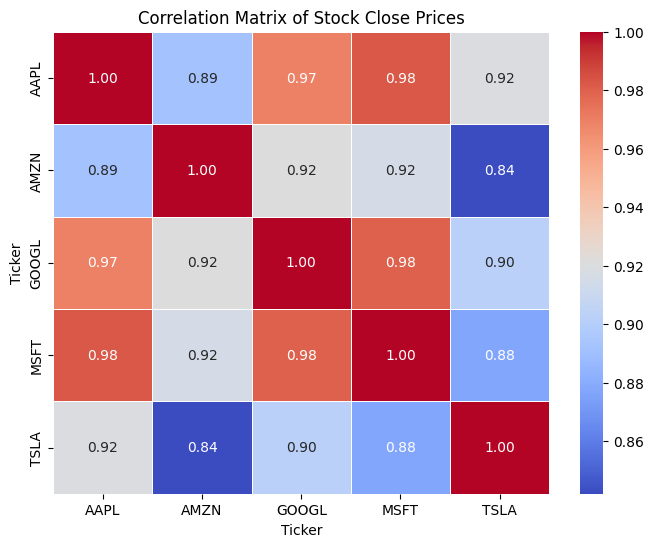

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

stock_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2015-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# Download full OHLC data for all stocks
data = yf.download(stock_symbols, start=start_date, end=end_date)

# Extract only the 'Close' prices (this returns a DataFrame with multi-level columns)
close_prices = data['Close']

print(close_prices.shape)
print(close_prices.head())

# Calculate correlation matrix on Close prices
corr_matrix = close_prices.corr()

print("Correlation matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Stock Close Prices')
plt.show()


[*********************100%***********************]  4 of 4 completed


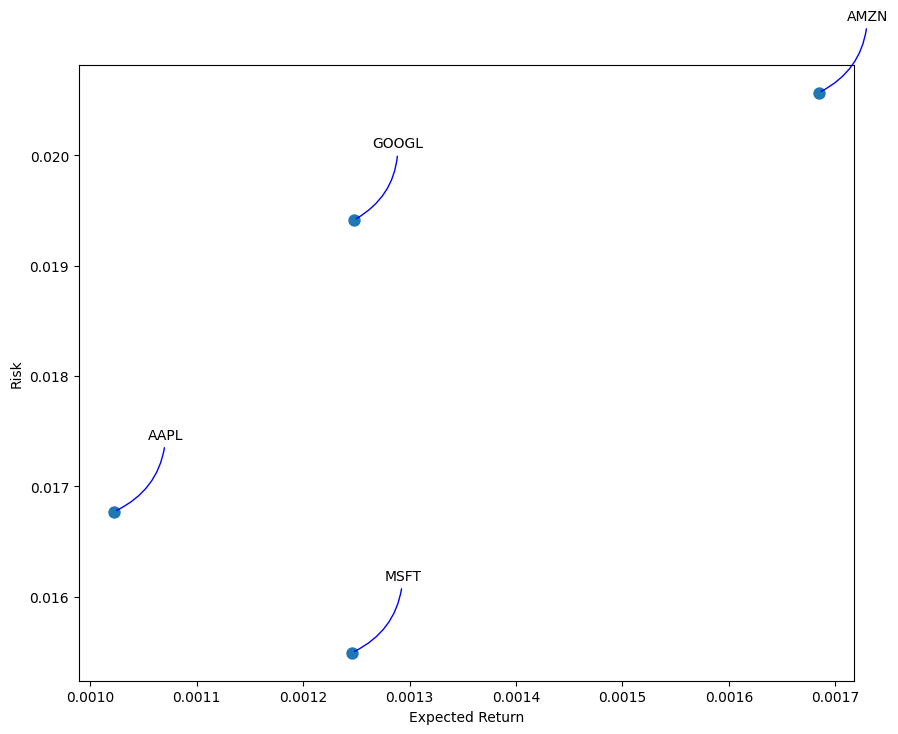

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Define the tech stocks and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2023-01-01'
end_date = '2025-05-20'

# Download stock data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract 'Close' for each ticker (MultiIndex column structure)
close_prices = data['Close'][tickers]

# Calculate daily returns
tech_rets = close_prices.pct_change().dropna()

# Your scatter plot code
rets = tech_rets
area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', 
                 ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()

[*********************100%***********************]  1 of 1 completed


Data shape: (1352, 5)
Data columns: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Data head:
 Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400
2020-01-03  71.914825  72.676454  71.689965  71.847125  146322800
2020-01-06  72.487862  72.526549  70.783263  71.034724  118387200
2020-01-07  72.146927  72.753808  71.926900  72.497514  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200
Epoch 1/10
32/32 [==============================] - 4s 26ms/step - loss: 0.0613
Epoch 2/10
32/32 [==============================] - 1s 25ms/step - loss: 0.0031
Epoch 3/10
32/32 [==============================] - 1s 25ms/step 

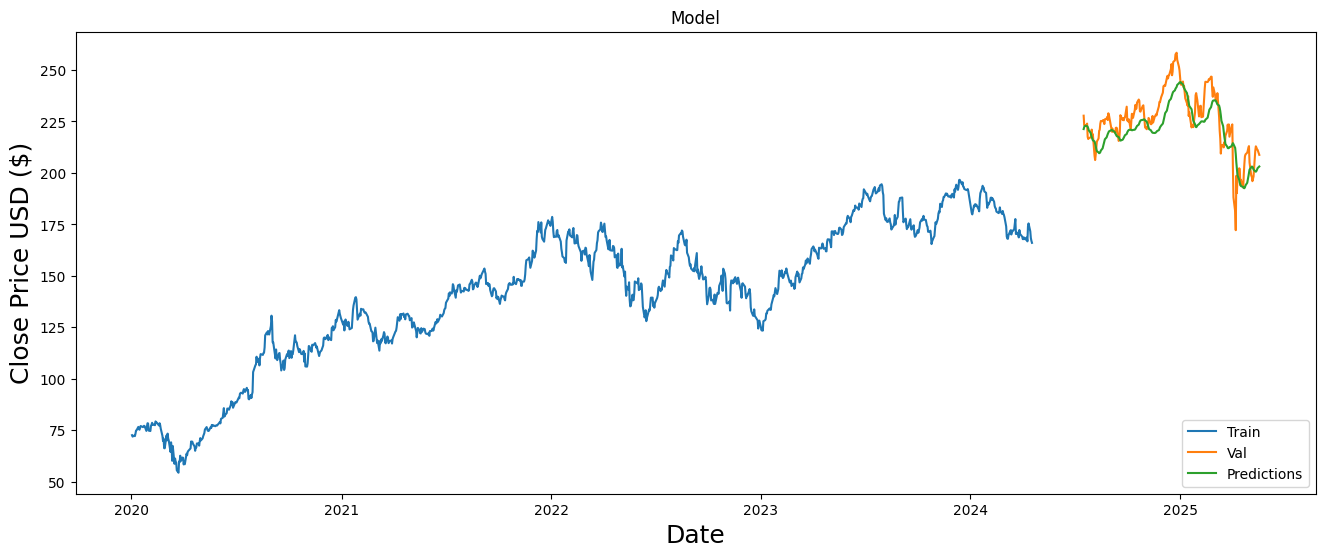

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf

# Load data (for reproducibility)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2025-05-20')
if data.empty:
    raise ValueError(f"No data retrieved for {ticker}. Check ticker, date range, or network.")

# Verify data
print("Data shape:", data.shape)
print("Data columns:", data.columns)
print("Data head:\n", data.head())

# Split data
training_data_len = int(len(data) * 0.8)
train = data[:training_data_len]
valid = data[training_data_len:]

if valid.empty:
    print("Validation set is empty. Data length:", len(data), "Training length:", training_data_len)
    raise ValueError("Empty validation set")

# Initialize and fit scaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit scaler on training data (reshape to 2D array as required by sklearn)
scaled_train = scaler.fit_transform(train[('Close', ticker)].values.reshape(-1, 1))

# Prepare training data for LSTM
sequence_length = 60
X_train = []
y_train = []
for i in range(sequence_length, len(train)):
    X_train.append(scaled_train[i-sequence_length:i, 0])
    y_train.append(scaled_train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Assuming model is defined (e.g., LSTM)
# Example: Replace with your actual model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Prepare validation data for LSTM
# Scale validation data using the fitted scaler
scaled_valid = scaler.transform(valid[('Close', ticker)].values.reshape(-1, 1))
X_valid = []
for i in range(sequence_length, len(valid)):
    X_valid.append(scaled_valid[i-sequence_length:i, 0])
X_valid = np.array(X_valid)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))

# Generate predictions
predictions = model.predict(X_valid)
predictions = scaler.inverse_transform(predictions).flatten()

# Align predictions with valid
valid = valid.iloc[sequence_length:].copy()
valid[('Predictions', ticker)] = predictions

# Verify lengths
print("Length of valid:", len(valid))
print("Length of predictions:", len(predictions))

# Plotting
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[('Close', ticker)])
plt.plot(valid[('Close', ticker)])
plt.plot(valid[('Predictions', ticker)])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [3]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Download data
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data = df[['Close']].values

# 2. Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Create sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

X, y = create_sequences(data_scaled)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 4. Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Define and train model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# 6. Predict and evaluate
y_pred = model.predict(X_test)
y_test_real = scaler.inverse_transform(y_test)
y_pred_real = scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test_real, y_pred_real)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


[*********************100%***********************]  1 of 1 completed

Epoch 1/10
 1/30 [>.............................] - ETA: 1s - loss: 9.0230e-04

30/30 [==============================] - 1s 48ms/step - loss: 9.1618e-04 - val_loss: 0.0027
Epoch 2/10
30/30 [==============================] - 1s 47ms/step - loss: 8.8364e-04 - val_loss: 0.0019
Epoch 3/10
30/30 [==============================] - 1s 46ms/step - loss: 8.3899e-04 - val_loss: 0.0022
Epoch 4/10
30/30 [==============================] - 2s 50ms/step - loss: 7.9189e-04 - val_loss: 0.0015
Epoch 5/10
30/30 [==============================] - 1s 49ms/step - loss: 7.6733e-04 - val_loss: 0.0024
Epoch 6/10
30/30 [==============================] - 1s 45ms/step - loss: 8.0165e-04 - val_loss: 0.0014
Epoch 7/10
30/30 [==============================] - 1s 46ms/step - loss: 7.2937e-04 - val_loss: 9.1968e-04
Epoch 8/10
30/30 [==============================] - 1s 46ms/step - loss: 6.6911e-04 - val_loss: 0.0011
Epoch 9/10
30/30 [==============================] - 1s 47ms/step - loss: 6.7253e-04 - val_loss: 0.0012
Epoch 10/10
30/30 [==============================] - 1s 48ms/step - loss: 6.2774

In [8]:
for date, row in alert_days.iterrows():
    val = row['Percent_Drop_Open']
    if isinstance(val, pd.Series) or isinstance(val, np.ndarray):
        drop_value = abs(val[0])
    else:
        drop_value = abs(val)
    print(f"Alert! On {date.date()}, {ticker} opened with a drop of {drop_value:.2f}% from previous close.")



Alert! On 2020-02-24, AAPL opened with a drop of 5.04% from previous close.
Alert! On 2020-02-27, AAPL opened with a drop of 3.95% from previous close.
Alert! On 2020-02-28, AAPL opened with a drop of 5.94% from previous close.
Alert! On 2020-03-06, AAPL opened with a drop of 3.73% from previous close.
Alert! On 2020-03-09, AAPL opened with a drop of 8.75% from previous close.
Alert! On 2020-03-12, AAPL opened with a drop of 7.08% from previous close.
Alert! On 2020-03-16, AAPL opened with a drop of 12.96% from previous close.
Alert! On 2020-03-18, AAPL opened with a drop of 5.18% from previous close.
Alert! On 2020-04-01, AAPL opened with a drop of 3.06% from previous close.
Alert! On 2020-09-03, AAPL opened with a drop of 3.42% from previous close.
Alert! On 2020-09-08, AAPL opened with a drop of 5.80% from previous close.
Alert! On 2020-10-02, AAPL opened with a drop of 3.34% from previous close.
Alert! On 2020-10-30, AAPL opened with a drop of 3.69% from previous close.
Alert! On 2